Data Augmentation이란? 

data augmentation : 데이터 셋을 여러가지 방법으로 증강시켜 실질적인 학습 데이터셋의 규모를 키울 수 있는 방법 

일반적으로 하드에 저장된 이미지 데이터를 메모리에 로드한 후 학습시킬 때 변형을 가함
데이터가 많아 진다는 것은 overfitting을 줄일 수 있다는 것을 의미
    


data augmentation method

1. 수직 축 대칭 

2. 무작위 cropping

=======================
자주 사용하지는 않음

3. rotation

4. shearing

5. local warping 

=======================

color shifting
(자주 사용하는 방법)

color shifting 방법

PCA(주성분 분석)라는 알고리즘 사용 

PCA는 전체적인 색조는 유지하면서 G,R,B를 조금씩 조정한다. 

[세부적인 내용_ alexnet 참조](PCA 구현 오픈소스 찾아보기)

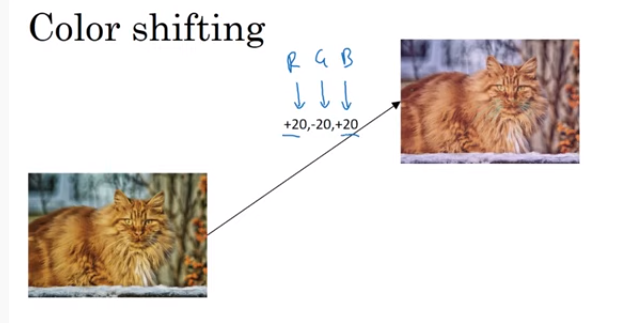




harddisk - cpu thread - 색변환, color change가 됨

cpu thread는 이미지를 불러오면서 변형에 필요할 때 구현하기 위해 mini batch를 만들어줍니다.   
학습된 데이터는 다른 layer로 전달되어 training 할 때 cpu나 gpu를 통해 재학습이 진행됩니다. 

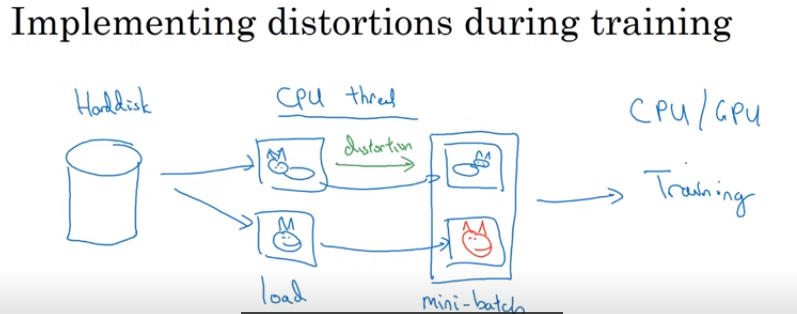

**질문1. data augmentation 시 cpu에서 color change 및 duplication을 1번하고 그걸 바탕으로 학습을 시키는 것인가요???**

 아닙니다. 데이터 확대를 하기 위해서 하나의 cpu thread 혹은 다중 thread로 데이터를 불러오고 변형을 구현해 줍니다. 그것을 다른 thread나 layer로 전달하여 학습을 실행합니다. 
 
 cpu thread와 training은 동시에 실행될 수도 있다고 합니다. 
 
 data augmentation도 몇가지의 parameter를 갖습니다. 
 
 - color change 시 r,g,b 설정하기 
 - crapping 할 때 얼마나 무작위로 할 것인가?
 
 쉽게 접근하는 방법은 open source를 통해서 공부해보는게 좋단다!


데이터가 많아진다는 것은 overfitting을 줄일 수 있다는 것을 의미합니다. 

우리가 가지고 있는 데이터셋이 실제 상황에서의 입력값과 다를 경우, augmentation을 통해서 실제 입력값과 비슷한 데이터 분포를 만들어 낼 수있습니다. 

ex) 학습 데이터는 노이즈가 많이 없는 사진이지만 test image는 다양한 노이즈가 있다면 좋은 성능을 내기 위해서는 노이즈의 분포를 예측하고 학습 데이터에 노이즈를 삽입해 모델이 노이즈에 잘 대응할 수있도록 해야합니다. 

data augmentation은 데이터를 늘릴 뿐만 아니라 모델이 테스트 환경에서 잘 동작할 수 있도록 도와주기도 합니다. 

**질문2) noise란 무엇이며 noise data를 data augmentation을 통해 어떻게 늘릴 수있나요?**

정답: 노이즈란 지지직 이미지를 말하며 합쳐서 학습시킬 수있다. 


이미지 데이터 augmentation

ex) - 인스타그램 사진 업로드시 색상 필터 적용하기
    - 좌우 대칭, 상하 반전 공간적으로 이미지를 조작 할 수 있음

### Data Augmentation이란? 
(2) 다양한 image augmentation 방법 

- keras preprocessing layers

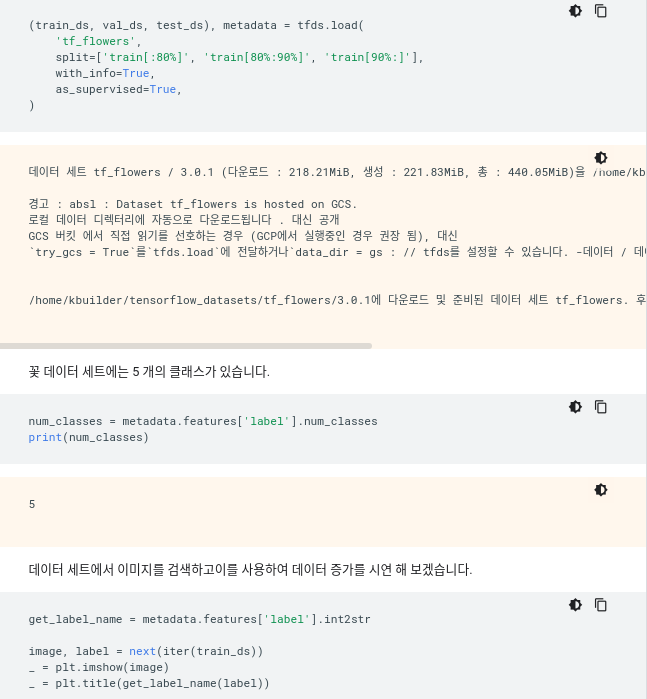

**질문3) 데이터 세트 다운로드 시 with_info = True, as_supervised = True의 의미는?**

https://teddylee777.github.io/tensorflow/tfds-datasets

답: with_info는 데이터셋의 정보를 확인하는 info를 함께 불러오는 속성이있음. 데이터셋 정보 확인하려면 true로 둬야합니다. 

as_supervised = True는 데이터가 불러올 때 딕셔너리 형태인데 튜플형식으로 변형되어 받아집니다. 그렇게 되면 중복없이! 조작금지로 받아짐.

**질문4) dataset의 class를 확인 시 features['label'].num_classes 이건 어떻게? 구현되는것인가유?**

**질문5)int2str은 무엇일까요?**

정답: 정수를 문자로 변환시켜라

**Flipping**
이미지 대칭하기

-분류 문제에서는 문제가 없지만 detection과 segmentation문제 등 정확한 정답 영역이 존재하는 문제에 적용할 때에는 라벨도 같이 좌우 반전을 해줘야 합니다. 

문자인식은 노노입니다. 반전시 다른 글자가 되버리기 때문입니다. 

**Gray scale**

d = |g1 - g2|

**질문6)rgb이미지를 하나의 채널을 어디에 가중치를 주어서 합이 1이 되었는지를 확인할 수 있나요?**
            

**saturation**

이미지의 선명도 조절

hsv를 사용하여 (인간이 보는 것과 유사하게 구현해줌)  saturation 채널에 오프셋을 적용. 

조금 더 이미지를 선명하게 만들어 줍니다. 다시 RGB로 변경해야함. 

참고참고

**영상인식과 색상모델**

1. 기본적인 색상 모델 알아보기 

1)gray모델 : 색정보를 사용하지 않고 밝기 정보만으로 영상을 표현한다. 
             장점: 촬영환경에 따라 달라지기에 색을 사용하지 않고 밝기정보만 사용하는 방법
             단점:
2)rgb모델 : 가장 기본적인 생상모델로 색을 Red, Green, Blue의 3가지 성분의 조합으로 생각함.

d = sqrt{(r1-r2)^2 +(g1-g2)^2 + (b1-b2)^2}

3)HSV모델:  HUE(색조)선명도, saturation(채도), Value(명도)밝기, 머리속에서 상상하는 색을 가장 쉽게 만들어 낼 수있는 모델임. H값은 색의 종류를 나타내기 때문에 크기는 의미가 없으며 단순 인덱스를 나타낸다. 
h만 사용하면 d = |h1 - h2|, 다 사용한다면 유클리디안거리를 이용해서 계산

h: 단순히 색이 어떤 색인지를 나타냄
s: 채도로 0이면 무채색 255이면 유채색
v: 명도 0일수록 어둡고, 클수록 밝음 

밝기만 사용할 것인가? 밝기와 색을 모두 사용할 것인가? 색만 사용할 것인가? 색만 사용하되 밝기정보를 부분적으로 활용할 것인지 등은 응용과 상황에 따라서 잘 선택되어야 한다. 

**Brightness**

밝기를 조절할 수도 있음 RGB(255,255,255)는 흰색, (0,0,0)은 검은색을 의미함

R,G,B를 더해주면 밝아지고, 빼면 어두어짐 

**Rotation**

각도 변환의 유의사항: 90도 단위로 돌리지 않을 경우 직사각형 형태에서 기존 이미지로 채우지 못하는 영역을 어떻게 처리해야 할지 유의해야함. 

**Center Crop** 

이미지의 중앙을 기준으로 확대하는 방법

너무 작게 확대할 경우 본래 가진 라벨과 맞지 않게 되는 상황이 발생할 수 있음. 이미지 확대시 털만 보이게 확대해서는 안된답니다. 

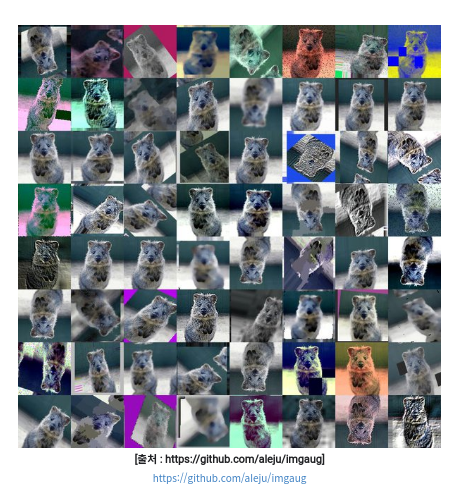

- 로테이션 시 나머지 부분을 채워 넣어줌 



### 3-5. 텐서플로우를 사용한 Image Augmentation 

1) Flip

코드 진행해보기 필요에 따라서 ㅁ개변수를 전달하는 값을 바꿔보고 데이터에 랜덤하게 적용하겠뜸

In [1]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = os.getenv('HOME')+'/aiffel/data_augmentation/images/mycat.jpg'
sample_img_path

'/home/aiffel042/aiffel/data_augmentation/images/mycat.jpg'

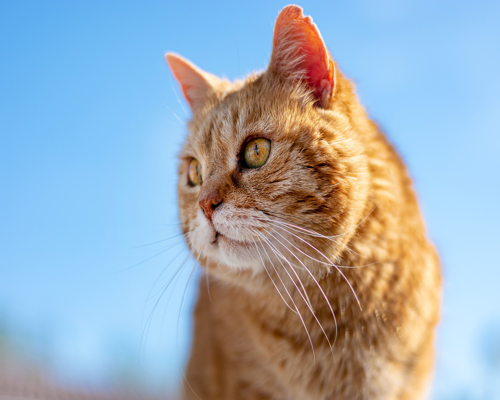

In [2]:
## resize

image = Image.open(sample_img_path).resize((500,400))
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

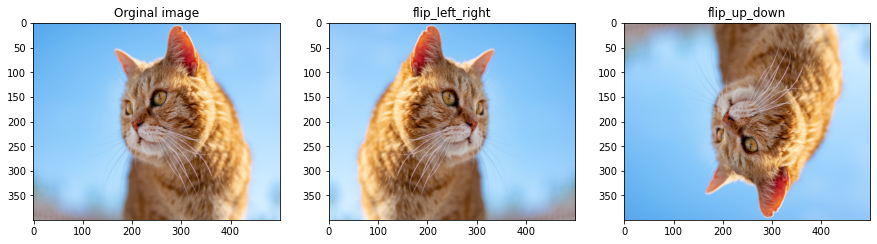

In [3]:
### Flip해보기 

flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.title('Orginal image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

함수들은 일괄적으로 상하 또는 좌우 반전을 적용합니다.
우리는 이를 확률에 따라서 적용되도록 해야합니다. 
그래야 반전이 되지 않은 원본 데이터도 활용이 될 수 있기 때문이죠. 이를 위해서 활용할 수 잇는 것은 

random augmentation을 어떻게 작동하는지 확인해보기!

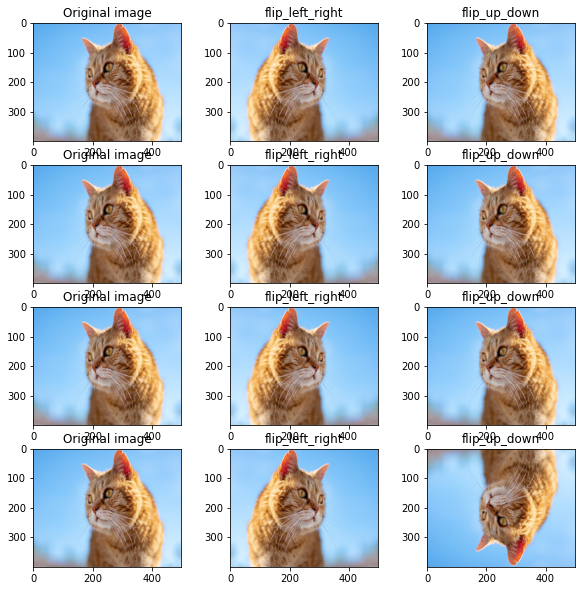

In [4]:
plt.figure(figsize=(10,10))

row = 4

for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)
    
    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)
    
    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

### 3-6 텐서플로우를 사용한 Image Augmentation (2) Center Crop3-6 

central_fraction을 얼마나 확대를 할 지를 조절하는 매개변수입니다. 
1.0 인 경우는 원본이미지와 같습니다. 

0.25수준으로가면 고양이의 털만 보일 수도 잇으니 주의해서 범위를 조절해야합니다. 

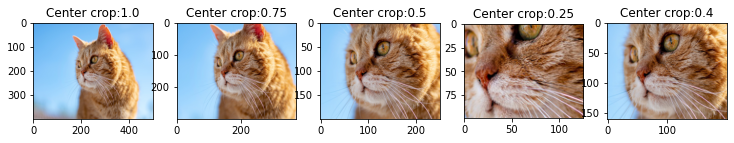

In [6]:
plt.figure(figsize=(15,15))

central_fractions = [1.0,0.75,0.5,0.25,0.4]

col = len(central_fractions)

for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor,frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1, i + 1)
    plt.title(f'Center crop:{frac}')
    plt.imshow(cropped_img)

In [6]:
def random_central_crop(image_tensor, range = (0,1)):
    central_fraction = tf.random.uniform([1], minval = range[0], maxval = range[1],
                                         dtype = tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor

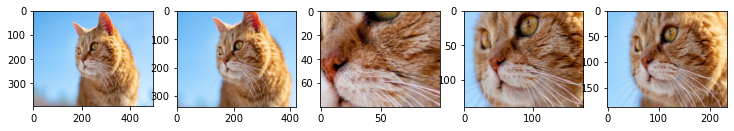

In [7]:
plt.figure(figsize = (15,15))

col = 5
for i , frac in enumerate(central_fractions):
    cropped_tensor = random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1, i+1)
    plt.imshow(cropped_img)

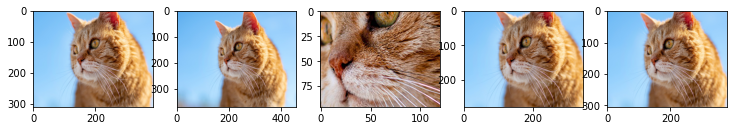

In [8]:
plt.figure(figsize = (15,15))

for i , frac in enumerate(central_fractions):
    cropped_tensor = random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1, i+1)
    plt.imshow(cropped_img)

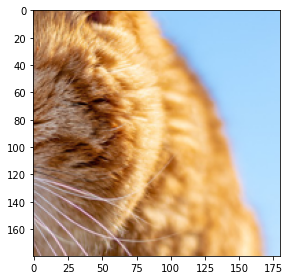

In [9]:
plt. figure(figsize = (15, 15))

random_crop_tensor = tf.image.random_crop(image_tensor, [180,180,3])
random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)

plt.subplot(1,3,1)
plt.imshow(random_crop_image)

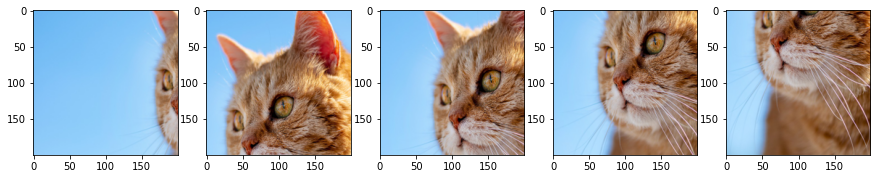

In [10]:
plt.figure(figsize = (15,15))

for i in range(5):
    random_crop_tensor = tf.image.random_crop(image_tensor, [200,200,3])
    random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)
    plt.subplot(1,5, i+1)
    plt.imshow(random_crop_image)

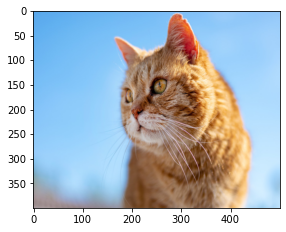

In [11]:
plt.figure(figsize = (15,15))
random_brightness = tf.image.random_brightness(image_tensor,max_delta = 255)
random_brightness_image = tf.keras.preprocessing.image.array_to_img(random_brightness)

plt.subplot(1,3,1)
plt.imshow(random_brightness_image)

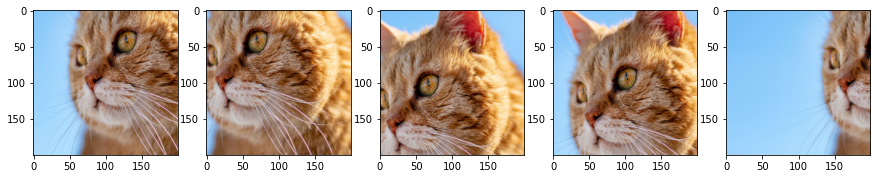

In [12]:
plt.figure(figsize = (15,15))

for i in range(5):
    random_crop_tensor = tf.image.random_crop(image_tensor, [200,200,3])
    random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)
    plt.subplot(1,5, i+1)
    plt.imshow(random_crop_image)

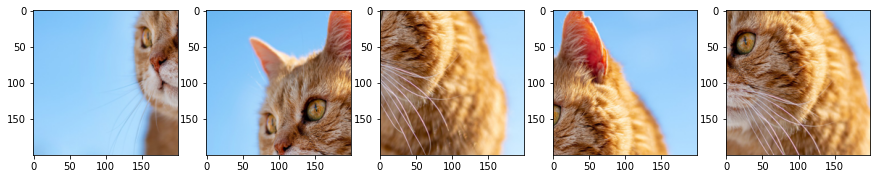

In [13]:
plt.figure(figsize = (15,15))

col = 5
for i in range(5):
    random_crop_tensor = tf.image.random_crop(image_tensor, [200,200,3])
    random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)
    plt.subplot(1,5, i+1)
    plt.imshow(random_crop_image)

In [ ]:
# col = 5가 있고 없고의 차이는?

In [14]:
import numpy as np
import imgaug.augmenters as iaa

image_arr = np.array(image)

In [15]:
### augmentation 기법 사용해 보기 

iaa.Affine()